In [ ]:
!git clone https://github.com/UCSD-AI4H/COVID-CT       #37-40sec

Cloning into 'COVID-CT'...
remote: Enumerating objects: 5463, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5463 (delta 0), reused 1 (delta 0), pack-reused 5459
Receiving objects: 100% (5463/5463), 1.09 GiB | 30.87 MiB/s, done.
Resolving deltas: 100% (360/360), done.
Checking out files: 100% (1048/1048), done.


In [ ]:
!unzip '/content/COVID-CT/Images-processed/CT_COVID.zip'
!unzip '/content/COVID-CT/Images-processed/CT_NonCOVID.zip'    #1sec

Archive:  /content/COVID-CT/Images-processed/CT_COVID.zip
   creating: CT_COVID/
  inflating: CT_COVID/2020.03.01.20029769-p21-73_1%1.png  
   creating: __MACOSX/
   creating: __MACOSX/CT_COVID/
  inflating: __MACOSX/CT_COVID/._2020.03.01.20029769-p21-73_1%1.png  
  inflating: CT_COVID/Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png  
  inflating: __MACOSX/CT_COVID/._Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png  
  inflating: CT_COVID/2020.03.12.20034686-p17-91-4.png  
  inflating: __MACOSX/CT_COVID/._2020.03.12.20034686-p17-91-4.png  
  inflating: CT_COVID/2020.02.25.20021568-p24-111%8.png  
  inflating: __MACOSX/CT_COVID/._2020.02.25.20021568-p24-111%8.png  
  inflating: CT_COVID/2020.03.13.20035212-p23-153.png  
  inflating: __MACOSX/CT_COVID/._2020.03.13.20035212-p23-153.png  
  inflating: CT_COVID/2020.03.21.20040691-p18-6-6.png  
  inflating: __MACOSX/CT_COVID/._2020.03.21.20040691-p18-6-6.png  


In [ ]:
import os
path='/content/CT_COVID/'
for count, filename in enumerate(os.listdir(path)): 
  dst ="covid" + str(count) + ".png"
  src =path+ filename 
  dst =path+ dst 
  os.rename(src, dst)


path='/content/CT_NonCOVID/'
for count, filename in enumerate(os.listdir(path)): 
  dst ="noncovid" + str(count) + ".png"
  src =path+ filename 
  dst =path+ dst 
  os.rename(src, dst)

In [ ]:
base_dir = '/content/covid19'
os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_covid_dir = os.path.join(train_dir, 'covid')
os.mkdir(train_covid_dir)

train_noncovid_dir = os.path.join(train_dir, 'noncovid')
os.mkdir(train_noncovid_dir)

validation_covid_dir = os.path.join(validation_dir, 'covid')
os.mkdir(validation_covid_dir)

validation_noncovid_dir = os.path.join(validation_dir, 'noncovid')
os.mkdir(validation_noncovid_dir)

test_covid_dir = os.path.join(test_dir, 'covid')
os.mkdir(test_covid_dir)

test_noncovid_dir = os.path.join(test_dir, 'noncovid')
os.mkdir(test_noncovid_dir)

In [ ]:
original_dataset_dir_covid='/content/CT_COVID/'
original_dataset_dir_non_covid='/content/CT_NonCOVID/'

import shutil
fnames=['covid{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src=os.path.join(original_dataset_dir_covid,fname)
    dst=os.path.join(train_covid_dir, fname)
    shutil.copyfile(src, dst)
    
fnames=['covid{}.png'.format(i) for i in range(250,300)]
for fname in fnames:
    src=os.path.join(original_dataset_dir_covid, fname)
    dst=os.path.join(validation_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames=['covid{}.png'.format(i) for i in range(300,348)]
for fname in fnames:
    src=os.path.join(original_dataset_dir_covid, fname)
    dst=os.path.join(test_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames=['noncovid{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src=os.path.join(original_dataset_dir_non_covid, fname)
    dst=os.path.join(train_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames=['noncovid{}.png'.format(i) for i in range(250,300)]
for fname in fnames:
    src=os.path.join(original_dataset_dir_non_covid, fname)
    dst=os.path.join(validation_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(300,348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(test_noncovid_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
from keras import layers
from keras import models
import time                              #2sec
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))                                             

model.add(layers.Flatten())                                                         

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))                                   
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 512)               89719296  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 89,720,705
Trainable params: 89,720,705
Non-trainable params: 0
____________________________________________

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=10,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=10,class_mode='binary')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=10,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=10,class_mode='binary')

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
for i in range(10,51,10):
  print('No.of Epochs -',i)
  start=time.time()
  history = model.fit(train_generator,steps_per_epoch=50,epochs=i,validation_data=validation_generator,validation_steps=10)
  stop=time.time()
  print(stop-start)

No.of Epochs - 10
Epoch 1/10
50/50 [==============================] - 49s 958ms/step - loss: 3.1610 - acc: 0.5260 - val_loss: 0.9762 - val_acc: 0.5700
Epoch 2/10
50/50 [==============================] - 47s 949ms/step - loss: 1.4792 - acc: 0.6160 - val_loss: 1.1422 - val_acc: 0.5300
Epoch 3/10
50/50 [==============================] - 47s 948ms/step - loss: 1.2020 - acc: 0.6200 - val_loss: 2.3189 - val_acc: 0.5300
Epoch 4/10
50/50 [==============================] - 47s 945ms/step - loss: 0.9151 - acc: 0.6660 - val_loss: 0.6325 - val_acc: 0.6600
Epoch 5/10
50/50 [==============================] - 47s 947ms/step - loss: 0.7802 - acc: 0.7060 - val_loss: 0.5044 - val_acc: 0.7300
Epoch 6/10
50/50 [==============================] - 47s 948ms/step - loss: 0.5432 - acc: 0.7760 - val_loss: 0.6705 - val_acc: 0.6400
Epoch 7/10
50/50 [==============================] - 49s 973ms/step - loss: 0.4379 - acc: 0.8020 - val_loss: 0.5965 - val_acc: 0.7000
Epoch 8/10
50/50 [==============================] -

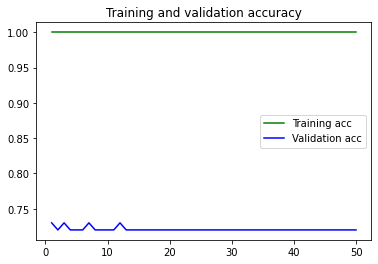

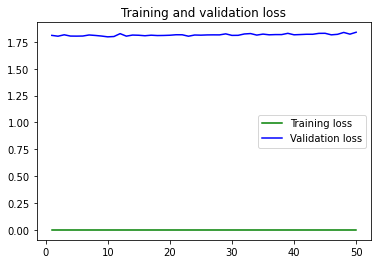

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model1.add(layers.MaxPooling2D((2, 2)))                                             

model1.add(layers.Flatten())                                                         
model1.add(Dropout(0.9))                                                    

model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid')) 

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dropout (Dropout)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 512)               89719296  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                        

In [ ]:
from tensorflow.keras import optimizers
model1.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=10,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=10,class_mode='binary')

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


No.of Epochs - 10
Epoch 1/10
50/50 [==============================] - 47s 911ms/step - loss: 1.1140 - acc: 0.5340 - val_loss: 0.6654 - val_acc: 0.6000
Epoch 2/10
50/50 [==============================] - 44s 884ms/step - loss: 0.7256 - acc: 0.5880 - val_loss: 0.6545 - val_acc: 0.7000
Epoch 3/10
50/50 [==============================] - 45s 908ms/step - loss: 0.6788 - acc: 0.6420 - val_loss: 0.6654 - val_acc: 0.5900
Epoch 4/10
50/50 [==============================] - 45s 904ms/step - loss: 0.6764 - acc: 0.6280 - val_loss: 0.6190 - val_acc: 0.6900
Epoch 5/10
50/50 [==============================] - 45s 902ms/step - loss: 0.6343 - acc: 0.6760 - val_loss: 1.0228 - val_acc: 0.5300
Epoch 6/10
50/50 [==============================] - 45s 900ms/step - loss: 0.6039 - acc: 0.6880 - val_loss: 0.5996 - val_acc: 0.7000
Epoch 7/10
50/50 [==============================] - 45s 899ms/step - loss: 0.5402 - acc: 0.7420 - val_loss: 0.6513 - val_acc: 0.6700
Epoch 8/10
50/50 [==============================] -

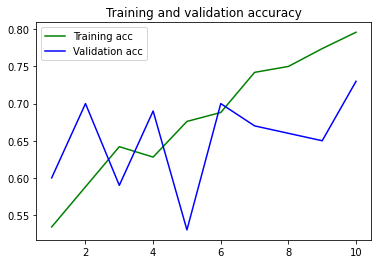

No.of Epochs - 20
Epoch 1/20
50/50 [==============================] - 45s 900ms/step - loss: 0.3694 - acc: 0.8320 - val_loss: 0.5790 - val_acc: 0.7100
Epoch 2/20
50/50 [==============================] - 45s 899ms/step - loss: 0.3262 - acc: 0.8520 - val_loss: 0.5978 - val_acc: 0.7200
Epoch 3/20
50/50 [==============================] - 45s 901ms/step - loss: 0.2729 - acc: 0.8800 - val_loss: 0.5839 - val_acc: 0.7300
Epoch 4/20
50/50 [==============================] - 45s 897ms/step - loss: 0.2293 - acc: 0.9160 - val_loss: 0.5969 - val_acc: 0.7200
Epoch 5/20
50/50 [==============================] - 46s 919ms/step - loss: 0.2151 - acc: 0.9120 - val_loss: 0.6601 - val_acc: 0.7600
Epoch 6/20
50/50 [==============================] - 45s 901ms/step - loss: 0.1693 - acc: 0.9360 - val_loss: 0.7214 - val_acc: 0.7200
Epoch 7/20
50/50 [==============================] - 44s 883ms/step - loss: 0.1577 - acc: 0.9420 - val_loss: 0.6500 - val_acc: 0.7200
Epoch 8/20
50/50 [==============================] -

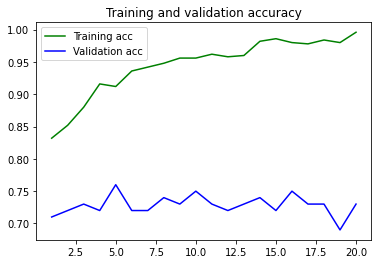

No.of Epochs - 30
Epoch 1/30
50/50 [==============================] - 45s 903ms/step - loss: 0.0291 - acc: 0.9880 - val_loss: 0.8294 - val_acc: 0.7400
Epoch 2/30
50/50 [==============================] - 46s 919ms/step - loss: 0.0569 - acc: 0.9760 - val_loss: 0.8465 - val_acc: 0.7400
Epoch 3/30
50/50 [==============================] - 45s 904ms/step - loss: 0.0354 - acc: 0.9880 - val_loss: 0.9092 - val_acc: 0.7300
Epoch 4/30
50/50 [==============================] - 45s 903ms/step - loss: 0.0345 - acc: 0.9880 - val_loss: 0.8623 - val_acc: 0.7300
Epoch 5/30
50/50 [==============================] - 45s 902ms/step - loss: 0.0399 - acc: 0.9860 - val_loss: 0.8492 - val_acc: 0.7500
Epoch 6/30
50/50 [==============================] - 45s 902ms/step - loss: 0.0317 - acc: 0.9900 - val_loss: 0.9165 - val_acc: 0.7300
Epoch 7/30
50/50 [==============================] - 44s 884ms/step - loss: 0.0141 - acc: 0.9980 - val_loss: 0.9432 - val_acc: 0.7400
Epoch 8/30
50/50 [==============================] -

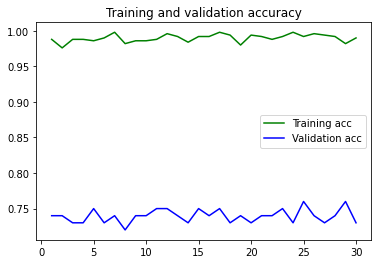

No.of Epochs - 40
Epoch 1/40
50/50 [==============================] - 45s 895ms/step - loss: 0.0178 - acc: 0.9920 - val_loss: 1.2659 - val_acc: 0.7400
Epoch 2/40
50/50 [==============================] - 45s 893ms/step - loss: 0.0162 - acc: 0.9980 - val_loss: 1.0907 - val_acc: 0.7600
Epoch 3/40
50/50 [==============================] - 45s 885ms/step - loss: 0.0224 - acc: 0.9920 - val_loss: 1.2623 - val_acc: 0.7400
Epoch 4/40
50/50 [==============================] - 45s 893ms/step - loss: 0.0160 - acc: 0.9940 - val_loss: 1.2770 - val_acc: 0.7400
Epoch 5/40
50/50 [==============================] - 45s 893ms/step - loss: 0.0358 - acc: 0.9900 - val_loss: 1.2133 - val_acc: 0.7500
Epoch 6/40
50/50 [==============================] - 45s 893ms/step - loss: 0.0059 - acc: 0.9980 - val_loss: 1.3497 - val_acc: 0.7300
Epoch 7/40
50/50 [==============================] - 45s 893ms/step - loss: 0.0084 - acc: 0.9980 - val_loss: 1.4434 - val_acc: 0.7500
Epoch 8/40
50/50 [==============================] -

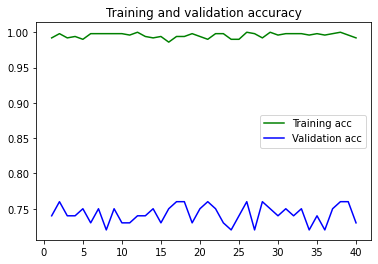

No.of Epochs - 50
Epoch 1/50
50/50 [==============================] - 45s 892ms/step - loss: 0.0202 - acc: 0.9940 - val_loss: 1.5057 - val_acc: 0.7300
Epoch 2/50
50/50 [==============================] - 44s 871ms/step - loss: 0.0064 - acc: 0.9960 - val_loss: 1.6754 - val_acc: 0.7600
Epoch 3/50
50/50 [==============================] - 44s 890ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.5259 - val_acc: 0.7300
Epoch 4/50
50/50 [==============================] - 45s 907ms/step - loss: 0.0093 - acc: 0.9980 - val_loss: 1.7599 - val_acc: 0.7400
Epoch 5/50
50/50 [==============================] - 44s 872ms/step - loss: 0.0175 - acc: 0.9940 - val_loss: 1.5504 - val_acc: 0.7200
Epoch 6/50
50/50 [==============================] - 45s 894ms/step - loss: 0.0192 - acc: 0.9900 - val_loss: 1.9672 - val_acc: 0.7400
Epoch 7/50
50/50 [==============================] - 44s 871ms/step - loss: 0.0112 - acc: 0.9940 - val_loss: 1.9415 - val_acc: 0.7500
Epoch 8/50
50/50 [==============================] -

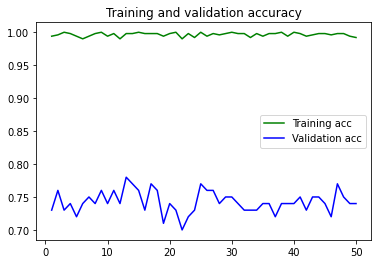

In [ ]:
for i in range(10,51,10):
  print('No.of Epochs -',i)
  start=time.time()
  history = model1.fit(train_generator,steps_per_epoch=50,epochs=i,validation_data=validation_generator,validation_steps=10)
  stop=time.time()
  print(stop-start)
  
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'green', label='Training acc')
  plt.plot(epochs, val_acc, 'blue', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.show()

##  

#  

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model2.add(layers.MaxPooling2D((2, 2))) 
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten()) 
model2.add(Dropout(0.9))                                                    
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid')) 

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 82944)             0         
                                                                 
 dropout_2 (Dropout)         (None, 82944)            

In [ ]:
from tensorflow.keras import optimizers
model2.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=10,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=10,class_mode='binary')

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


No.of Epochs - 10
Epoch 1/10
50/50 [==============================] - 36s 680ms/step - loss: 0.8446 - acc: 0.5600 - val_loss: 0.6611 - val_acc: 0.6700
Epoch 2/10
50/50 [==============================] - 35s 705ms/step - loss: 0.6889 - acc: 0.5880 - val_loss: 0.6806 - val_acc: 0.6100
Epoch 3/10
50/50 [==============================] - 33s 657ms/step - loss: 0.6345 - acc: 0.6460 - val_loss: 0.6151 - val_acc: 0.6500
Epoch 4/10
50/50 [==============================] - 34s 677ms/step - loss: 0.6113 - acc: 0.6700 - val_loss: 0.6304 - val_acc: 0.6800
Epoch 5/10
50/50 [==============================] - 34s 676ms/step - loss: 0.5469 - acc: 0.7100 - val_loss: 0.5952 - val_acc: 0.6600
Epoch 6/10
50/50 [==============================] - 34s 677ms/step - loss: 0.5098 - acc: 0.7400 - val_loss: 0.5683 - val_acc: 0.7000
Epoch 7/10
50/50 [==============================] - 37s 744ms/step - loss: 0.4476 - acc: 0.7880 - val_loss: 0.6182 - val_acc: 0.6700
Epoch 8/10
50/50 [==============================] -

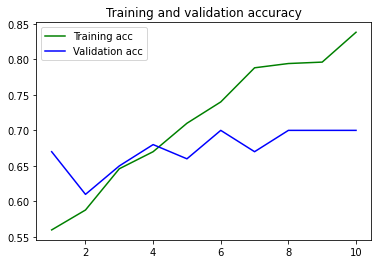

No.of Epochs - 20
Epoch 1/20
50/50 [==============================] - 34s 679ms/step - loss: 0.3469 - acc: 0.8440 - val_loss: 0.6054 - val_acc: 0.7000
Epoch 2/20
50/50 [==============================] - 34s 678ms/step - loss: 0.3306 - acc: 0.8540 - val_loss: 0.5749 - val_acc: 0.7200
Epoch 3/20
50/50 [==============================] - 34s 681ms/step - loss: 0.2956 - acc: 0.8680 - val_loss: 0.5918 - val_acc: 0.7100
Epoch 4/20
50/50 [==============================] - 34s 684ms/step - loss: 0.2808 - acc: 0.8940 - val_loss: 0.6376 - val_acc: 0.7100
Epoch 5/20
50/50 [==============================] - 33s 664ms/step - loss: 0.2363 - acc: 0.8880 - val_loss: 0.7928 - val_acc: 0.7000
Epoch 6/20
50/50 [==============================] - 34s 681ms/step - loss: 0.2216 - acc: 0.9040 - val_loss: 0.6047 - val_acc: 0.7200
Epoch 7/20
50/50 [==============================] - 33s 661ms/step - loss: 0.2350 - acc: 0.9000 - val_loss: 0.5896 - val_acc: 0.7300
Epoch 8/20
50/50 [==============================] -

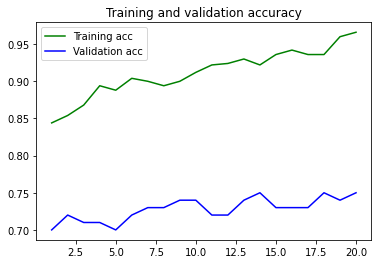

No.of Epochs - 30
Epoch 1/30
50/50 [==============================] - 34s 676ms/step - loss: 0.1163 - acc: 0.9520 - val_loss: 0.7076 - val_acc: 0.7400
Epoch 2/30
50/50 [==============================] - 34s 680ms/step - loss: 0.1578 - acc: 0.9440 - val_loss: 0.7090 - val_acc: 0.7500
Epoch 3/30
50/50 [==============================] - 33s 661ms/step - loss: 0.1746 - acc: 0.9420 - val_loss: 0.7426 - val_acc: 0.7400
Epoch 4/30
50/50 [==============================] - 34s 680ms/step - loss: 0.1058 - acc: 0.9640 - val_loss: 0.7435 - val_acc: 0.7300
Epoch 5/30
50/50 [==============================] - 33s 661ms/step - loss: 0.1393 - acc: 0.9420 - val_loss: 0.7965 - val_acc: 0.7300
Epoch 6/30
50/50 [==============================] - 35s 700ms/step - loss: 0.1493 - acc: 0.9420 - val_loss: 0.7316 - val_acc: 0.7400
Epoch 7/30
50/50 [==============================] - 33s 662ms/step - loss: 0.1190 - acc: 0.9460 - val_loss: 0.7830 - val_acc: 0.7500
Epoch 8/30
50/50 [==============================] -

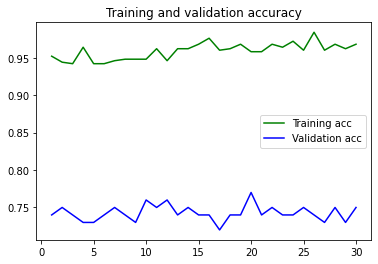

No.of Epochs - 40
Epoch 1/40
50/50 [==============================] - 34s 684ms/step - loss: 0.0886 - acc: 0.9660 - val_loss: 0.8700 - val_acc: 0.7500
Epoch 2/40
50/50 [==============================] - 33s 665ms/step - loss: 0.0566 - acc: 0.9760 - val_loss: 0.8361 - val_acc: 0.7600
Epoch 3/40
50/50 [==============================] - 34s 687ms/step - loss: 0.0635 - acc: 0.9800 - val_loss: 0.8755 - val_acc: 0.7600
Epoch 4/40
50/50 [==============================] - 33s 666ms/step - loss: 0.0820 - acc: 0.9700 - val_loss: 0.9173 - val_acc: 0.7700
Epoch 5/40
50/50 [==============================] - 33s 668ms/step - loss: 0.0608 - acc: 0.9760 - val_loss: 0.9252 - val_acc: 0.7500
Epoch 6/40
50/50 [==============================] - 35s 704ms/step - loss: 0.0722 - acc: 0.9700 - val_loss: 0.9624 - val_acc: 0.7400
Epoch 7/40
50/50 [==============================] - 33s 665ms/step - loss: 0.0859 - acc: 0.9680 - val_loss: 0.9525 - val_acc: 0.7600
Epoch 8/40
50/50 [==============================] -

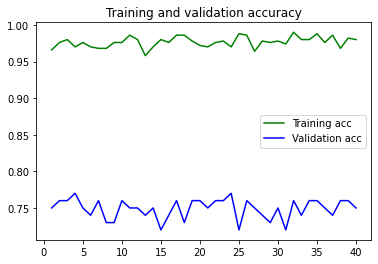

No.of Epochs - 50
Epoch 1/50
50/50 [==============================] - 33s 662ms/step - loss: 0.0567 - acc: 0.9780 - val_loss: 0.9986 - val_acc: 0.7500
Epoch 2/50
50/50 [==============================] - 33s 661ms/step - loss: 0.0557 - acc: 0.9820 - val_loss: 0.9515 - val_acc: 0.7500
Epoch 3/50
50/50 [==============================] - 34s 679ms/step - loss: 0.0619 - acc: 0.9680 - val_loss: 1.0932 - val_acc: 0.7400
Epoch 4/50
50/50 [==============================] - 34s 681ms/step - loss: 0.0458 - acc: 0.9800 - val_loss: 1.0172 - val_acc: 0.7300
Epoch 5/50
50/50 [==============================] - 34s 680ms/step - loss: 0.0398 - acc: 0.9840 - val_loss: 1.0094 - val_acc: 0.7500
Epoch 6/50
50/50 [==============================] - 34s 682ms/step - loss: 0.0600 - acc: 0.9800 - val_loss: 1.2852 - val_acc: 0.7400
Epoch 7/50
50/50 [==============================] - 33s 665ms/step - loss: 0.0689 - acc: 0.9840 - val_loss: 1.0780 - val_acc: 0.7400
Epoch 8/50
50/50 [==============================] -

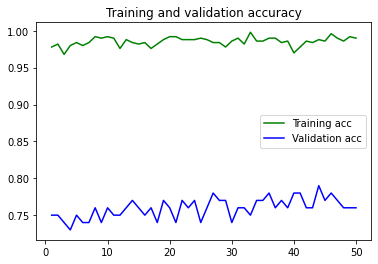

In [ ]:
for i in range(10,51,10):
  print('No.of Epochs -',i)
  start=time.time()
  history = model2.fit(train_generator,steps_per_epoch=50,epochs=i,validation_data=validation_generator,validation_steps=10)
  stop=time.time()
  print(stop-start)
  
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'green', label='Training acc')
  plt.plot(epochs, val_acc, 'blue', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.show()

#  

#  

In [ ]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model3.add(layers.MaxPooling2D((2, 2))) 
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten()) 
model3.add(Dropout(0.9))                                                    


model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid')) 

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
from tensorflow.keras import optimizers
model3.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=10,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=10,class_mode='binary')

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


No.of Epochs - 10
Epoch 1/10
50/50 [==============================] - 30s 570ms/step - loss: 0.7373 - acc: 0.4940 - val_loss: 0.6755 - val_acc: 0.6000
Epoch 2/10
50/50 [==============================] - 29s 587ms/step - loss: 0.6972 - acc: 0.5360 - val_loss: 0.6655 - val_acc: 0.6200
Epoch 3/10
50/50 [==============================] - 30s 600ms/step - loss: 0.6618 - acc: 0.5980 - val_loss: 0.6532 - val_acc: 0.6100
Epoch 4/10
50/50 [==============================] - 31s 629ms/step - loss: 0.6389 - acc: 0.6480 - val_loss: 0.6817 - val_acc: 0.5700
Epoch 5/10
50/50 [==============================] - 28s 565ms/step - loss: 0.6118 - acc: 0.6520 - val_loss: 0.6422 - val_acc: 0.6600
Epoch 6/10
50/50 [==============================] - 29s 585ms/step - loss: 0.5826 - acc: 0.7100 - val_loss: 0.6060 - val_acc: 0.6400
Epoch 7/10
50/50 [==============================] - 28s 566ms/step - loss: 0.5715 - acc: 0.6960 - val_loss: 0.6012 - val_acc: 0.6800
Epoch 8/10
50/50 [==============================] -

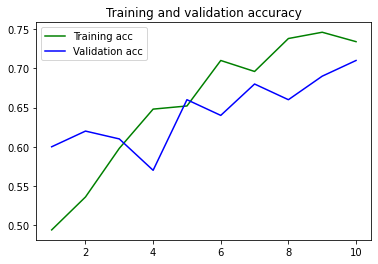

No.of Epochs - 20
Epoch 1/20
50/50 [==============================] - 29s 588ms/step - loss: 0.4641 - acc: 0.7680 - val_loss: 0.6441 - val_acc: 0.6600
Epoch 2/20
50/50 [==============================] - 29s 587ms/step - loss: 0.4726 - acc: 0.7860 - val_loss: 0.5614 - val_acc: 0.7300
Epoch 3/20
50/50 [==============================] - 29s 588ms/step - loss: 0.4379 - acc: 0.7940 - val_loss: 0.5676 - val_acc: 0.7300
Epoch 4/20
50/50 [==============================] - 28s 566ms/step - loss: 0.4367 - acc: 0.7880 - val_loss: 0.5466 - val_acc: 0.7500
Epoch 5/20
50/50 [==============================] - 29s 575ms/step - loss: 0.4126 - acc: 0.8020 - val_loss: 0.5454 - val_acc: 0.7300
Epoch 6/20
50/50 [==============================] - 28s 565ms/step - loss: 0.3846 - acc: 0.8140 - val_loss: 0.6057 - val_acc: 0.7400
Epoch 7/20
50/50 [==============================] - 29s 587ms/step - loss: 0.4029 - acc: 0.8160 - val_loss: 0.5503 - val_acc: 0.7400
Epoch 8/20
50/50 [==============================] -

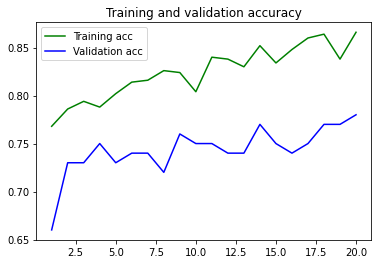

No.of Epochs - 30
Epoch 1/30
50/50 [==============================] - 29s 572ms/step - loss: 0.2792 - acc: 0.8700 - val_loss: 0.5553 - val_acc: 0.7700
Epoch 2/30
50/50 [==============================] - 29s 589ms/step - loss: 0.2830 - acc: 0.8660 - val_loss: 0.5364 - val_acc: 0.7900
Epoch 3/30
50/50 [==============================] - 28s 568ms/step - loss: 0.2997 - acc: 0.8660 - val_loss: 0.6195 - val_acc: 0.7400
Epoch 4/30
50/50 [==============================] - 28s 565ms/step - loss: 0.2974 - acc: 0.8500 - val_loss: 0.6203 - val_acc: 0.7200
Epoch 5/30
50/50 [==============================] - 29s 588ms/step - loss: 0.2523 - acc: 0.9040 - val_loss: 0.5309 - val_acc: 0.7900
Epoch 6/30
50/50 [==============================] - 28s 568ms/step - loss: 0.3038 - acc: 0.8640 - val_loss: 0.5408 - val_acc: 0.7900
Epoch 7/30
50/50 [==============================] - 30s 593ms/step - loss: 0.2667 - acc: 0.8760 - val_loss: 0.6383 - val_acc: 0.7300
Epoch 8/30
50/50 [==============================] -

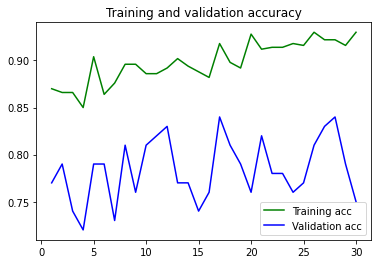

No.of Epochs - 40
Epoch 1/40
50/50 [==============================] - 30s 589ms/step - loss: 0.1891 - acc: 0.9460 - val_loss: 0.5506 - val_acc: 0.8300
Epoch 2/40
50/50 [==============================] - 29s 571ms/step - loss: 0.1898 - acc: 0.9220 - val_loss: 0.5108 - val_acc: 0.8300
Epoch 3/40
50/50 [==============================] - 29s 577ms/step - loss: 0.1932 - acc: 0.9080 - val_loss: 0.6204 - val_acc: 0.7600
Epoch 4/40
50/50 [==============================] - 28s 568ms/step - loss: 0.1667 - acc: 0.9280 - val_loss: 0.5256 - val_acc: 0.8100
Epoch 5/40
50/50 [==============================] - 29s 588ms/step - loss: 0.1877 - acc: 0.9320 - val_loss: 0.5669 - val_acc: 0.8100
Epoch 6/40
50/50 [==============================] - 28s 568ms/step - loss: 0.1663 - acc: 0.9280 - val_loss: 0.6422 - val_acc: 0.7600
Epoch 7/40
50/50 [==============================] - 29s 587ms/step - loss: 0.1742 - acc: 0.9320 - val_loss: 0.5637 - val_acc: 0.8100
Epoch 8/40
50/50 [==============================] -

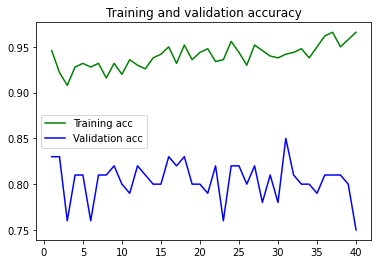

No.of Epochs - 50
Epoch 1/50
50/50 [==============================] - 31s 612ms/step - loss: 0.1315 - acc: 0.9480 - val_loss: 0.5848 - val_acc: 0.8000
Epoch 2/50
50/50 [==============================] - 28s 569ms/step - loss: 0.0949 - acc: 0.9660 - val_loss: 0.6298 - val_acc: 0.8100
Epoch 3/50
50/50 [==============================] - 30s 591ms/step - loss: 0.1105 - acc: 0.9600 - val_loss: 0.6033 - val_acc: 0.8200
Epoch 4/50
50/50 [==============================] - 28s 569ms/step - loss: 0.1229 - acc: 0.9580 - val_loss: 0.6647 - val_acc: 0.8100
Epoch 5/50
50/50 [==============================] - 29s 572ms/step - loss: 0.1057 - acc: 0.9540 - val_loss: 0.6461 - val_acc: 0.7900
Epoch 6/50
50/50 [==============================] - 28s 568ms/step - loss: 0.1263 - acc: 0.9440 - val_loss: 0.6125 - val_acc: 0.8000
Epoch 7/50
50/50 [==============================] - 30s 590ms/step - loss: 0.1032 - acc: 0.9600 - val_loss: 0.5910 - val_acc: 0.8200
Epoch 8/50
50/50 [==============================] -

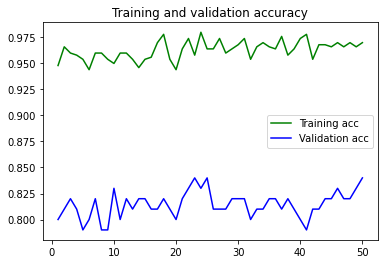

In [ ]:
for i in range(10,51,10):
  print('No.of Epochs -',i)
  start=time.time()
  history = model3.fit(train_generator,steps_per_epoch=50,epochs=i,validation_data=validation_generator,validation_steps=10)
  stop=time.time()
  print(stop-start)
  
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'green', label='Training acc')
  plt.plot(epochs, val_acc, 'blue', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.show()

#  

#  

In [ ]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model4.add(layers.MaxPooling2D((2, 2))) 
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Flatten()) 
model4.add(Dropout(0.9))                                                    

model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid')) 

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
from tensorflow.keras import optimizers
model4.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=10,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=10,class_mode='binary')

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


No.of Epochs - 10
Epoch 1/10
50/50 [==============================] - 26s 485ms/step - loss: 0.6971 - acc: 0.5240 - val_loss: 0.6898 - val_acc: 0.5400
Epoch 2/10
50/50 [==============================] - 25s 502ms/step - loss: 0.6987 - acc: 0.4940 - val_loss: 0.6908 - val_acc: 0.5100
Epoch 3/10
50/50 [==============================] - 24s 488ms/step - loss: 0.6973 - acc: 0.5280 - val_loss: 0.7004 - val_acc: 0.5000
Epoch 4/10
50/50 [==============================] - 25s 502ms/step - loss: 0.6944 - acc: 0.5060 - val_loss: 0.6857 - val_acc: 0.5300
Epoch 5/10
50/50 [==============================] - 24s 482ms/step - loss: 0.6903 - acc: 0.5360 - val_loss: 0.6839 - val_acc: 0.5300
Epoch 6/10
50/50 [==============================] - 25s 503ms/step - loss: 0.6894 - acc: 0.5060 - val_loss: 0.6826 - val_acc: 0.5300
Epoch 7/10
50/50 [==============================] - 24s 481ms/step - loss: 0.6825 - acc: 0.5520 - val_loss: 0.6768 - val_acc: 0.6300
Epoch 8/10
50/50 [==============================] -

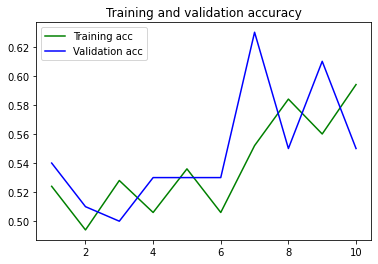

No.of Epochs - 20
Epoch 1/20
50/50 [==============================] - 24s 483ms/step - loss: 0.6639 - acc: 0.5700 - val_loss: 0.6522 - val_acc: 0.5200
Epoch 2/20
50/50 [==============================] - 24s 482ms/step - loss: 0.6434 - acc: 0.6140 - val_loss: 0.6500 - val_acc: 0.5600
Epoch 3/20
50/50 [==============================] - 24s 482ms/step - loss: 0.6345 - acc: 0.6220 - val_loss: 0.6601 - val_acc: 0.5500
Epoch 4/20
50/50 [==============================] - 25s 504ms/step - loss: 0.6332 - acc: 0.6360 - val_loss: 0.6292 - val_acc: 0.5700
Epoch 5/20
50/50 [==============================] - 24s 483ms/step - loss: 0.6121 - acc: 0.6540 - val_loss: 0.6221 - val_acc: 0.6300
Epoch 6/20
50/50 [==============================] - 25s 506ms/step - loss: 0.6164 - acc: 0.6800 - val_loss: 0.6251 - val_acc: 0.5700
Epoch 7/20
50/50 [==============================] - 24s 482ms/step - loss: 0.6129 - acc: 0.6440 - val_loss: 0.6119 - val_acc: 0.6000
Epoch 8/20
50/50 [==============================] -

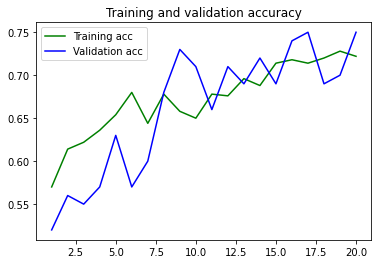

No.of Epochs - 30
Epoch 1/30
50/50 [==============================] - 25s 505ms/step - loss: 0.5227 - acc: 0.7460 - val_loss: 0.5294 - val_acc: 0.7000
Epoch 2/30
50/50 [==============================] - 24s 482ms/step - loss: 0.5272 - acc: 0.7140 - val_loss: 0.5258 - val_acc: 0.7000
Epoch 3/30
50/50 [==============================] - 25s 506ms/step - loss: 0.5080 - acc: 0.7540 - val_loss: 0.5211 - val_acc: 0.7300
Epoch 4/30
50/50 [==============================] - 24s 483ms/step - loss: 0.4906 - acc: 0.7680 - val_loss: 0.5215 - val_acc: 0.7300
Epoch 5/30
50/50 [==============================] - 26s 528ms/step - loss: 0.4831 - acc: 0.7700 - val_loss: 0.5528 - val_acc: 0.7600
Epoch 6/30
50/50 [==============================] - 24s 482ms/step - loss: 0.5165 - acc: 0.7500 - val_loss: 0.5134 - val_acc: 0.7600
Epoch 7/30
50/50 [==============================] - 25s 503ms/step - loss: 0.5067 - acc: 0.7400 - val_loss: 0.5247 - val_acc: 0.7400
Epoch 8/30
50/50 [==============================] -

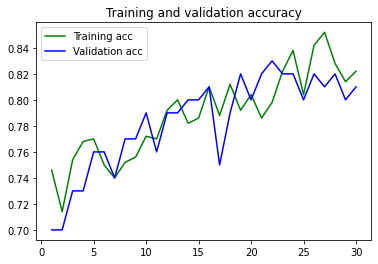

No.of Epochs - 40
Epoch 1/40
50/50 [==============================] - 24s 484ms/step - loss: 0.3659 - acc: 0.8180 - val_loss: 0.4467 - val_acc: 0.8200
Epoch 2/40
50/50 [==============================] - 25s 504ms/step - loss: 0.3652 - acc: 0.8300 - val_loss: 0.4435 - val_acc: 0.7800
Epoch 3/40
50/50 [==============================] - 24s 483ms/step - loss: 0.3321 - acc: 0.8580 - val_loss: 0.4359 - val_acc: 0.7900
Epoch 4/40
50/50 [==============================] - 25s 506ms/step - loss: 0.3917 - acc: 0.8240 - val_loss: 0.4441 - val_acc: 0.8200
Epoch 5/40
50/50 [==============================] - 24s 483ms/step - loss: 0.3373 - acc: 0.8680 - val_loss: 0.4514 - val_acc: 0.8000
Epoch 6/40
50/50 [==============================] - 25s 505ms/step - loss: 0.3226 - acc: 0.8540 - val_loss: 0.4362 - val_acc: 0.8100
Epoch 7/40
50/50 [==============================] - 24s 484ms/step - loss: 0.3131 - acc: 0.8660 - val_loss: 0.4363 - val_acc: 0.7600
Epoch 8/40
50/50 [==============================] -

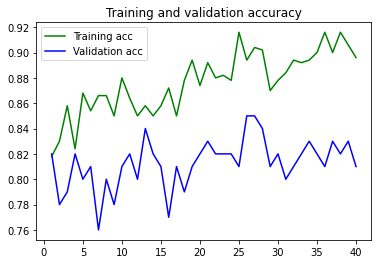

No.of Epochs - 50
Epoch 1/50
50/50 [==============================] - 25s 490ms/step - loss: 0.2212 - acc: 0.9060 - val_loss: 0.4190 - val_acc: 0.8200
Epoch 2/50
50/50 [==============================] - 24s 488ms/step - loss: 0.2099 - acc: 0.9220 - val_loss: 0.4122 - val_acc: 0.8400
Epoch 3/50
50/50 [==============================] - 25s 510ms/step - loss: 0.2269 - acc: 0.9080 - val_loss: 0.4286 - val_acc: 0.8400
Epoch 4/50
50/50 [==============================] - 24s 486ms/step - loss: 0.1954 - acc: 0.9240 - val_loss: 0.4574 - val_acc: 0.8400
Epoch 5/50
50/50 [==============================] - 24s 488ms/step - loss: 0.1946 - acc: 0.9120 - val_loss: 0.3801 - val_acc: 0.8500
Epoch 6/50
50/50 [==============================] - 24s 487ms/step - loss: 0.2144 - acc: 0.9080 - val_loss: 0.4411 - val_acc: 0.8200
Epoch 7/50
50/50 [==============================] - 26s 511ms/step - loss: 0.2067 - acc: 0.9220 - val_loss: 0.4120 - val_acc: 0.8300
Epoch 8/50
50/50 [==============================] -

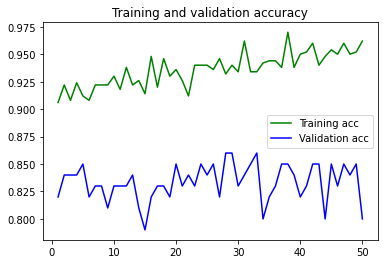

In [ ]:
for i in range(10,51,10):
  print('No.of Epochs -',i)
  start=time.time()
  history = model4.fit(train_generator,steps_per_epoch=50,epochs=i,validation_data=validation_generator,validation_steps=10)
  stop=time.time()
  print(stop-start)
  
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'green', label='Training acc')
  plt.plot(epochs, val_acc, 'blue', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.show()

#  

#  

In [ ]:
model6 = models.Sequential()
model6.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model6.add(layers.MaxPooling2D((2, 2))) 
model6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(128, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(128, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(256, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Flatten()) 
model6.add(Dropout(0.9))                                                    

model6.add(layers.Dense(512, activation='relu'))
model6.add(layers.Dense(1, activation='sigmoid')) 


model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
from tensorflow.keras import optimizers
model6.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=10,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=10,class_mode='binary')

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


No.of Epochs - 10
Epoch 1/10
50/50 [==============================] - 25s 482ms/step - loss: 0.7025 - acc: 0.4560 - val_loss: 0.6945 - val_acc: 0.5000
Epoch 2/10
50/50 [==============================] - 24s 477ms/step - loss: 0.6970 - acc: 0.4860 - val_loss: 0.6922 - val_acc: 0.5000
Epoch 3/10
50/50 [==============================] - 24s 478ms/step - loss: 0.6968 - acc: 0.4960 - val_loss: 0.6919 - val_acc: 0.5100
Epoch 4/10
50/50 [==============================] - 24s 478ms/step - loss: 0.6961 - acc: 0.5080 - val_loss: 0.6918 - val_acc: 0.5300
Epoch 5/10
50/50 [==============================] - 24s 478ms/step - loss: 0.6946 - acc: 0.5080 - val_loss: 0.6917 - val_acc: 0.5600
Epoch 6/10
50/50 [==============================] - 25s 507ms/step - loss: 0.6963 - acc: 0.5160 - val_loss: 0.6914 - val_acc: 0.5300
Epoch 7/10
50/50 [==============================] - 24s 478ms/step - loss: 0.6935 - acc: 0.5280 - val_loss: 0.6916 - val_acc: 0.5800
Epoch 8/10
50/50 [==============================] -

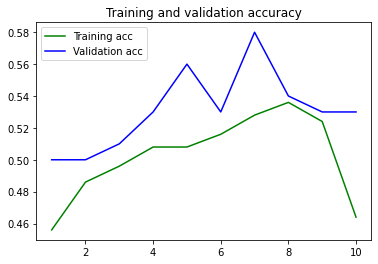

No.of Epochs - 20
Epoch 1/20
50/50 [==============================] - 25s 492ms/step - loss: 0.6919 - acc: 0.5120 - val_loss: 0.6882 - val_acc: 0.5400
Epoch 2/20
50/50 [==============================] - 24s 477ms/step - loss: 0.6859 - acc: 0.5420 - val_loss: 0.6863 - val_acc: 0.5400
Epoch 3/20
50/50 [==============================] - 24s 477ms/step - loss: 0.6890 - acc: 0.5260 - val_loss: 0.6835 - val_acc: 0.5400
Epoch 4/20
50/50 [==============================] - 25s 491ms/step - loss: 0.6860 - acc: 0.5120 - val_loss: 0.6802 - val_acc: 0.5400
Epoch 5/20
50/50 [==============================] - 24s 475ms/step - loss: 0.6800 - acc: 0.5560 - val_loss: 0.6761 - val_acc: 0.5400
Epoch 6/20
50/50 [==============================] - 24s 477ms/step - loss: 0.6782 - acc: 0.5300 - val_loss: 0.6730 - val_acc: 0.5400
Epoch 7/20
50/50 [==============================] - 24s 475ms/step - loss: 0.6771 - acc: 0.5180 - val_loss: 0.6705 - val_acc: 0.5400
Epoch 8/20
50/50 [==============================] -

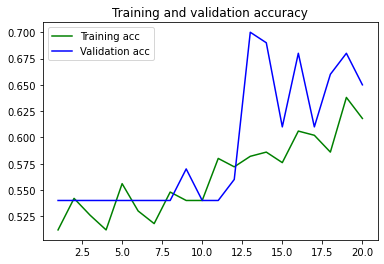

No.of Epochs - 30
Epoch 1/30
50/50 [==============================] - 24s 476ms/step - loss: 0.6341 - acc: 0.6160 - val_loss: 0.6108 - val_acc: 0.6800
Epoch 2/30
50/50 [==============================] - 24s 481ms/step - loss: 0.6256 - acc: 0.6700 - val_loss: 0.6073 - val_acc: 0.6900
Epoch 3/30
50/50 [==============================] - 24s 475ms/step - loss: 0.6273 - acc: 0.6480 - val_loss: 0.5918 - val_acc: 0.6500
Epoch 4/30
50/50 [==============================] - 24s 474ms/step - loss: 0.6188 - acc: 0.6380 - val_loss: 0.5824 - val_acc: 0.6900
Epoch 5/30
50/50 [==============================] - 24s 488ms/step - loss: 0.6156 - acc: 0.6420 - val_loss: 0.5899 - val_acc: 0.6500
Epoch 6/30
50/50 [==============================] - 24s 474ms/step - loss: 0.6148 - acc: 0.6540 - val_loss: 0.5908 - val_acc: 0.6500
Epoch 7/30
50/50 [==============================] - 24s 475ms/step - loss: 0.5883 - acc: 0.6440 - val_loss: 0.5794 - val_acc: 0.6600
Epoch 8/30
50/50 [==============================] -

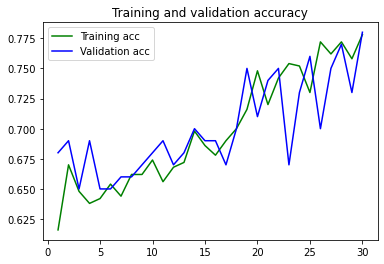

No.of Epochs - 40
Epoch 1/40
50/50 [==============================] - 25s 491ms/step - loss: 0.4407 - acc: 0.7940 - val_loss: 0.4488 - val_acc: 0.7900
Epoch 2/40
50/50 [==============================] - 24s 478ms/step - loss: 0.4475 - acc: 0.7960 - val_loss: 0.4585 - val_acc: 0.7200
Epoch 3/40
50/50 [==============================] - 24s 475ms/step - loss: 0.4234 - acc: 0.8000 - val_loss: 0.4572 - val_acc: 0.7600
Epoch 4/40
50/50 [==============================] - 24s 477ms/step - loss: 0.4433 - acc: 0.7920 - val_loss: 0.5114 - val_acc: 0.7300
Epoch 5/40
50/50 [==============================] - 24s 478ms/step - loss: 0.4243 - acc: 0.7880 - val_loss: 0.4744 - val_acc: 0.7700
Epoch 6/40
50/50 [==============================] - 24s 477ms/step - loss: 0.4232 - acc: 0.8020 - val_loss: 0.5005 - val_acc: 0.7600
Epoch 7/40
50/50 [==============================] - 25s 484ms/step - loss: 0.3803 - acc: 0.8060 - val_loss: 0.4635 - val_acc: 0.7900
Epoch 8/40
50/50 [==============================] -

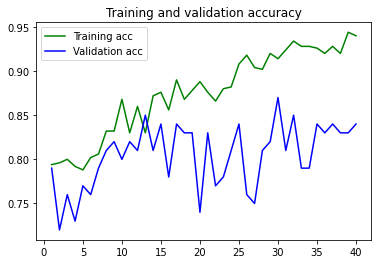

No.of Epochs - 50
Epoch 1/50
50/50 [==============================] - 25s 494ms/step - loss: 0.1503 - acc: 0.9440 - val_loss: 0.4035 - val_acc: 0.8300
Epoch 2/50
50/50 [==============================] - 24s 476ms/step - loss: 0.1276 - acc: 0.9660 - val_loss: 0.4632 - val_acc: 0.8200
Epoch 3/50
50/50 [==============================] - 25s 492ms/step - loss: 0.1567 - acc: 0.9320 - val_loss: 0.5850 - val_acc: 0.8000
Epoch 4/50
50/50 [==============================] - 24s 476ms/step - loss: 0.1312 - acc: 0.9500 - val_loss: 0.6186 - val_acc: 0.8000
Epoch 5/50
50/50 [==============================] - 25s 488ms/step - loss: 0.1323 - acc: 0.9640 - val_loss: 0.4894 - val_acc: 0.8500
Epoch 6/50
50/50 [==============================] - 24s 490ms/step - loss: 0.0955 - acc: 0.9620 - val_loss: 0.5164 - val_acc: 0.8400
Epoch 7/50
50/50 [==============================] - 24s 475ms/step - loss: 0.1059 - acc: 0.9620 - val_loss: 0.5629 - val_acc: 0.8300
Epoch 8/50
50/50 [==============================] -

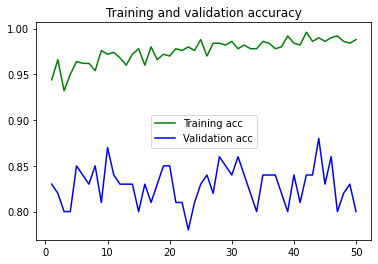

In [ ]:
for i in range(10,51,10):
  print('No.of Epochs -',i)
  start=time.time()
  history = model6.fit(train_generator,steps_per_epoch=50,epochs=i,validation_data=validation_generator,validation_steps=10)
  stop=time.time()
  print(stop-start)
  
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'green', label='Training acc')
  plt.plot(epochs, val_acc, 'blue', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.show()